<html><head><meta content="text/html; charset=UTF-8" http-equiv="content-type"><style type="text/css">ol</style></head><body class="c5"><p class="c0 c4"><span class="c3"></span></p><p class="c2 title" id="h.rrbabt268i6e"><h1>CaImAn&rsquo;s Demo pipeline</h1></p><p class="c0"><span class="c3">This notebook will help to demonstrate the process of CaImAn and how it uses different functions to denoise, deconvolve and demix neurons from a Calcium Imaging Video. </span></p>
<p><img src="docs/img/quickintro.png" /></p>
<p class="c0"><span class="c3">More information can be found in CaImAn&rsquo;s documentation. </span></p>
</html>



In [1]:
#!/usr/bin/env python
from __future__ import division
from __future__ import print_function
from builtins import zip
from builtins import str
from builtins import map
from builtins import range
from past.utils import old_div
try:
    get_ipython().magic(u'load_ext autoreload')
    get_ipython().magic(u'autoreload 2')    
except:
    print('Not IPYTHON')
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib qt')   
import caiman as cm
from caiman.source_extraction import cnmf
from caiman.utils.utils import download_demo
from caiman.utils.visualization import inspect_correlation_pnr
from caiman.components_evaluation import estimate_components_quality_auto
from caiman.motion_correction import motion_correct_oneP_rigid
import os
import cv2
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour

try:
    cv2.setNumThreads(1)
except:
    print('Open CV is naturally single threaded')
import bokeh.plotting as bpl
bpl.output_notebook()

/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Loading BokehJS ...

### Setup some parameters
many of them will be set directly calling the CNMF object

In [2]:
folder = '/media/sebastian/MYLINUXLIVE/MT/CaImAn/mov.hdf5'

fname = [folder]#[folder+f for f in os.listdir(folder) if ('recording' in f and '.tif' in f)]
print(fname)
frate = 10 # movie frame rate
gSig = 1   # gaussian width of a 2D gaussian kernel, which approximates a neuron
gSiz = 10  # average diameter of a neuron
do_motion_correction = True

['/media/sebastian/MYLINUXLIVE/MT/CaImAn/mov.hdf5']


Download the dataset if not already present

In [4]:
m_raw = cm.load_movie_chain(fname)
downsample_ratio = 0.2
offset_mov = -np.min(m_raw[:100]).astype(np.float32)  # make the dataset mostly non-negative
#m_raw.resize(1, 1, downsample_ratio).play(
#gain=2, offset=offset_mov, fr=30, magnification=1)

100%|██████████| 1/1 [00:05<00:00,  5.29s/it]


Crop stationary edges:

In [5]:

m_orig = m_raw.interactive_crop(
    gain=1, offset = -offset_mov, fr=30)   # play movie (press q to exit

offset_mov = np.min(m_orig[:100])
m_orig.save('cropped_combined.tif')

Select region, press [c] to crop
cropping at(102, 33),(558, 436)...
102 558 33 436
.tif
tifffile package not found, using skimage instead for imsave


In [6]:
m_orig.shape
m_orig.play()

### (Re)start cluster.  

In [7]:
try:
    dview.terminate() # stop it if it was running
except:
    pass

c, dview, n_processes = cm.cluster.setup_cluster(backend='local', # use this one
                                                 n_processes=16,  # number of process to use, if you go out of memory try to reduce this one
                                                 )

0
0
10
10
20
20
30
30
40
40
50
50
60
60
70
70
80
80
90
90
100
100
110
110
120
120
130
130
140
140
150
150
160
160
170
170
180
180
190
190
200
200
210
210
220
220
230
230
240
240
250
250
260
260
270
270
280
280
290
290
300
300
310
310
320
320
330
330
(674, 81, 81)
(674, 81, 81)
(674, 81, 81)
(674, 81, 81)
(674, 81, 81)
using 1 processes
(674, 81, 81)
using 1 processes
using 1 processes
using 1 processes
using 1600 pixels per process
using 1 processes
using 5000 block_size
(674, 81, 81)
(674, 81, 81)
(674, 81, 81)
using 1 processes
using 1 processes
preprocessing ...
(674, 81, 81)
using 1600 pixels per process
using 5000 block_size
checking if missing data
using 1600 pixels per process
using 5000 block_size
preprocessing ...
using 1600 pixels per process
using 1600 pixels per process
using 1 processes
using 1600 pixels per process
using 5000 block_size
using 1600 pixels per process
using 5000 block_size
using 5000 block_size
using 1 processes
preprocessing ...
(674, 81, 81)
preprocessing

/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


Compute Background


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


0 neurons have been initialized
0 neurons have been initialized
In total,  1 neurons were initialized.
In total,  1 neurons were initialized.
Compute Background
Compute Background
Compute Residuals
Initialization again
Compute Residuals
Initialization again
In total,  0 neurons were initialized.
Update Temporal
Generating residuals


/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/dia.py:300: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]


entering the deconvolution 


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
0 neurons have been initialized
memmaping
Updating Spatial Components using lasso lars
In total,  2 neurons were initialized.
Update Temporal
Generating residuals
entering the deconvolution 
2 out of total 2 temporal components updated
thresholding components
Computing residuals
2 out of total 2 temporal components updated
--- 0.4366419315338135 seconds ---
Removing tempfiles created
stopping: overall temporal component not changing significantly
Compute Background Again
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
--- 3.056443214416504 seconds ---
Removing tempfiles created
Compute Background Again
Compute Residuals
Initialization again
0 neurons have been initialized
In total,  2 neurons w

/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/dia.py:300: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]
/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


entering the deconvolution 
Updating Spatial Components using lasso lars
memmaping
stopping: overall temporal component not changing significantly
Updating Spatial Components using lasso lars
Update Spatial
Initializing update of Spatial Components
computing the distance indicators


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


memmaping
Updating Spatial Components using lasso lars
0 neurons have been initialized
thresholding components
In total,  2 neurons were initialized.
Computing residuals
0 neurons have been initialized
Update Temporal
--- 0.2839846611022949 seconds ---
Generating residuals
Removing tempfiles created
entering the deconvolution 
Compute Background Again
2 out of total 2 temporal components updated
2 out of total 2 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
In total,  3 neurons were initialized.
Update Temporal
thresholding components
Generating residuals
Computing residuals
entering the deconvolution 
--- 0.9063339233398438 seconds ---
Removing tempfiles created


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


3 out of total 3 temporal components updated
Compute Background Again


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


Compute Residuals
Initialization again
0 neurons have been initialized
0 neurons have been initialized
3 out of total 3 temporal components updated
In total,  1 neurons were initialized.
In total,  1 neurons were initialized.
stopping: overall temporal component not changing significantly
Update Spatial
Update Temporal
Update Temporal
Generating residuals
Initializing update of Spatial Components
entering the deconvolution 
Generating residuals
computing the distance indicators
1 out of total 1 temporal components updated
entering the deconvolution 
1 out of total 1 temporal components updated
memmaping
1 out of total 1 temporal components updated
stopping: overall temporal component not changing significantly
Updating Spatial Components using lasso lars
1 out of total 1 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
Initializing update 

/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/dia.py:300: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]


entering the deconvolution 
stopping: overall temporal component not changing significantly
Compute Residuals
Update Spatial
Initialization again
Initializing update of Spatial Components
computing the distance indicators
Compute Residuals
memmaping
Updating Spatial Components using lasso lars
Initialization again
thresholding components
Computing residuals
--- 0.12247872352600098 seconds ---
Removing tempfiles created
Compute Background Again
Compute Residuals
Initialization again
thresholding components
Computing residuals
--- 0.5388309955596924 seconds ---
Removing tempfiles created
Compute Background Again
In total,  0 neurons were initialized.
Update Temporal
Generating residuals
thresholding components


/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/dia.py:300: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]


Computing residuals
entering the deconvolution 
--- 0.6883156299591064 seconds ---
stopping: overall temporal component not changing significantly
Removing tempfiles created
Update Spatial
Compute Background Again
Initializing update of Spatial Components
In total,  0 neurons were initialized.
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
Update Temporal
Generating residuals


/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/dia.py:300: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]


entering the deconvolution 
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
memmaping
thresholding components
Updating Spatial Components using lasso lars
Computing residuals
--- 0.16971325874328613 seconds ---
Removing tempfiles created
thresholding components
Compute Background Again
Computing residuals
--- 0.0902559757232666 seconds ---
Removing tempfiles created
Compute Background Again
Compute Residuals
Initialization again
thresholding components
In total,  0 neurons were initialized.
Computing residuals
Update Temporal
--- 2.7852907180786133 seconds ---
Generating residuals
Removing tempfiles created
Compute Background Again


/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/dia.py:300: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]


entering the deconvolution 
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
--- 0.12914395332336426 seconds ---
Removing tempfiles created
Compute Background Again
thresholding components
In total,  0 neurons were initialized.
Computing residuals
Update Temporal
--- 2.461655855178833 seconds ---
Removing tempfiles created
Generating residuals


/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/dia.py:300: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]


Compute Background Again
entering the deconvolution 
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


thresholding components
Computing residuals
In total,  0 neurons were initialized.
--- 0.3329901695251465 seconds ---
0 neurons have been initialized
Removing tempfiles created
Update Temporal
In total,  1 neurons were initialized.
Compute Background Again
Generating residuals
Update Temporal


/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/dia.py:300: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]


Generating residuals
entering the deconvolution 
stopping: overall temporal component not changing significantly
entering the deconvolution 
1 out of total 1 temporal components updated
Update Spatial
Initializing update of Spatial Components
1 out of total 1 temporal components updated
computing the distance indicators
stopping: overall temporal component not changing significantly
memmaping
Update Spatial
Initializing update of Spatial Components
Updating Spatial Components using lasso lars
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
--- 2.944817066192627 seconds ---
Removing tempfiles created
Compute Background Again
thresholding components
Computing residuals
--- 0.35837316513061523 seconds ---
Removing tempfiles created
Compute Background Again
0 neurons have been initialized
In total,  1 neurons were initialized.
Update Temporal
Generating residuals
entering the deconvolution 
2 out of total 

/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


Generating residuals
parallel dot product block size: 1000
Start product
Transposing
999
1999
entering the deconvolution 
2999
3 out of total 3 temporal components updated
3999
3 out of total 3 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
4999
computing the distance indicators
5999
memmaping
Updating Spatial Components using lasso lars
6479
(674, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
Update Temporal
Generating residuals
entering the deconvolution 
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
initializing ...
thresholding components
Computing residuals
--- 1.5696258544921875 seconds ---
Removing tempfiles created
Spatial Downsampling 1-photo

/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


Roi Extraction...
One photon initialization..
parallel dot product block size: 1000
Start product
Transposing
999
1999
2999
3999
4999
5999
6560
(674, 81, 81)
In total,  0 neurons were initialized.
using 1 processes
Compute Background
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
Update Temporal
Generating residuals
thresholding components
Computing residuals
--- 11.43145489692688 seconds ---
Removing tempfiles created
Compute Background Again
entering the deconvolution 
1 out of total 1 temporal components updated
1 out of total 1 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
Update Temporal
Generating residuals
entering the deconvolution 
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial C

/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


0 neurons have been initialized
In total,  2 neurons were initialized.
Update Temporal
Generating residuals
entering the deconvolution 
2 out of total 2 temporal components updated
2 out of total 2 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
--- 14.214578628540039 seconds ---
Removing tempfiles created
Compute Background Again
thresholding components
Computing residuals
--- 9.677127361297607 seconds ---
Removing tempfiles created
Compute Background Again
thresholding components
Computing residuals
--- 3.9255635738372803 seconds ---
Removing tempfiles created
Compute Background Again
Compute Residuals
Initialization again
0 neurons have been initialized
In total,  4 neurons were initialized.
Update Temporal
Generating residuals
entering the deconvolutio

/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


parallel dot product block size: 1000
Start product
Transposing
999
1999
2999
3999
4999
5999
6479
(674, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
Estimate low rank Background
Update Temporal
Generating residuals
initializing ...
Spatial Downsampling 1-photon
Roi Extraction...
One photon initialization..
entering the deconvolution 
2 out of total 2 temporal components updated
2 out of total 2 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


Initializing update of Spatial Components
computing the distance indicators
Estimate low rank Background
memmaping
Updating Spatial Components using lasso lars
parallel dot product block size: 1000
Start product
Transposing
999
1999
2999
3999
4999
5999
6560


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


(674, 81, 81)
using 1 processes
0 neurons have been initialized
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
In total,  3 neurons were initialized.
Compute Background
Estimate low rank Background
Estimate low rank Background
Estimate low rank Background
Estimate low rank Background
Estimate low rank Background


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


parallel dot product block size: 1000
Start product
Transposing
initializing ...
999
Spatial Downsampling 1-photon
1999
2999
Roi Extraction...
One photon initialization..
Estimate low rank Background
3999
Estimate low rank Background
4999
5999
6560
thresholding components
Computing residuals
--- 10.072628498077393 seconds ---
Removing tempfiles created
Compute Background Again
(674, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
0 neurons have been initialized
Estimate low rank Background
In total,  3 neurons were initialized.
Compute Background
Estimate low rank Background


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]
/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]
/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision ti

parallel dot product block size: 1000
parallel dot product block size: 1000
Start product
Start product
Transposing
999
Transposing
999
1999
1999
2999
2999
parallel dot product block size: 1000
Start product
Transposing
3999
999
3999
1999
4999
4999
5999
2999
5999
6560
3999
4999
6560
5999
6560


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


Update Temporal
(674, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


(674, 81, 80)
(674, 81, 81)
parallel dot product block size: 1000
using 1 processes
using 1 processes
using 1600 pixels per process
Start product
using 5000 block_size
using 1600 pixels per process
Transposing
using 5000 block_size
preprocessing ...
999
preprocessing ...
checking if missing data
checking if missing data
1999
2999
Generating residuals
3999
4999
initializing ...
5999
parallel dot product block size: 1000
Start product
Spatial Downsampling 1-photon
Transposing
999
1999
6560
entering the deconvolution 
2999
Roi Extraction...
One photon initialization..
4 out of total 4 temporal components updated
4 out of total 4 temporal components updated
3999
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
4999
computing the distance indicators
5999
memmaping
Updating Spatial Components using lasso lars
6560
(674, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checki

/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


(674, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


parallel dot product block size: 1000
Start product
Transposing
999
1999
2999
3999
0 neurons have been initialized
4999
5999
parallel dot product block size: 1000
Start product
6560
Transposing
999


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


1999
In total,  5 neurons were initialized.
2999
Compute Background
3999
4999
5999
parallel dot product block size: 1000
6560
Start product
Transposing
999
1999
(674, 81, 81)
2999
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
3999
4999
5999
6560
(674, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


(674, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
parallel dot product block size: 1000
initializing ...
Start product
Spatial Downsampling 1-photon
Transposing
999
1999
Roi Extraction...
2999
One photon initialization..
initializing ...
Spatial Downsampling 1-photon
3999
initializing ...
4999
Spatial Downsampling 1-photon
Roi Extraction...
One photon initialization..
5999
6560
Roi Extraction...
One photon initialization..
(674, 81, 81)
initializing ...
using 1 processes
Spatial Downsampling 1-photon
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
Roi Extraction...
One photon initialization..
initializing ...
Spatial Downsampling 1-photon
0 neurons have been initialized
In total,  1 neurons were initialized.
Roi Extraction...


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


One photon initialization..
Compute Background
0 neurons have been initialized
In total,  1 neurons were initialized.
Compute Background


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


0 neurons have been initialized
In total,  2 neurons were initialized.
Compute Background


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


0 neurons have been initialized
initializing ...
Spatial Downsampling 1-photon
initializing ...
In total,  2 neurons were initialized.
Compute Background
Spatial Downsampling 1-photon
Roi Extraction...
One photon initialization..
Roi Extraction...
One photon initialization..


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


0 neurons have been initialized
In total,  1 neurons were initialized.
Compute Background
initializing ...
Spatial Downsampling 1-photon
Roi Extraction...
One photon initialization..


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


0 neurons have been initialized
0 neurons have been initialized
Estimate low rank Background
In total,  3 neurons were initialized.
Compute Background
In total,  6 neurons were initialized.


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


initializing ...
Compute Background
Spatial Downsampling 1-photon
0 neurons have been initialized
Roi Extraction...
One photon initialization..
In total,  6 neurons were initialized.
Estimate low rank Background
Compute Background
thresholding components
Computing residuals
--- 12.564930438995361 seconds ---
Removing tempfiles created
Compute Background Again
0 neurons have been initialized
In total,  5 neurons were initialized.
Compute Background
Estimate low rank Background


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


parallel dot product block size: 1000
Start product
Transposing
999
1999
2999
3999
4999


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


5999
6560
parallel dot product block size: 1000
Start product
Transposing
999
1999
2999
(674, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
3999
preprocessing ...
checking if missing data
4999
5999
6560
(674, 81, 80)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
initializing ...
Spatial Downsampling 1-photon
Roi Extraction...
One photon initialization..
initializing ...
Spatial Downsampling 1-photon
Roi Extraction...
One photon initialization..
0 neurons have been initialized
In total,  3 neurons were initialized.
Compute Background
Compute Residuals
Initialization again
0 neurons have been initialized
In total,  3 neurons were initialized.
Compute Background
0 neurons have been initialized
In total,  3 neurons were initialized.
Update Temporal
Generating residuals
entering the deconvolution 
6 out of total 6 temporal components updated
6 out of total 6 temporal components updated
stoppin

5 out of total 7 temporal components updated
7 out of total 7 temporal components updated
thresholding components
5 out of total 7 temporal components updated
7 out of total 7 temporal components updated
Computing residuals
stopping: overall temporal component not changing significantly
--- 2.998763084411621 seconds ---
Update Spatial
Removing tempfiles created
Initializing update of Spatial Components
Compute Background Again
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
initializing ...
Spatial Downsampling 1-photon
Roi Extraction...
One photon initialization..
0 neurons have been initialized
In total,  1 neurons were initialized.
Compute Background
thresholding components
Computing residuals
thresholding components
--- 9.579516887664795 seconds ---
Computing residuals
Removing tempfiles created
--- 6.6952292919158936 seconds ---
Compute Background Again
Removing tempfiles created
Compute Background Again
thresholding components
Computing re

Update Spatial
Initializing update of Spatial Components
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
Update Temporal
Update Temporal
Generating residuals
Update Temporal
Generating residuals
entering the deconvolution 
5 out of total 7 temporal components updated
7 out of total 7 temporal components updated
Generating residuals
5 out of total 7 temporal components updated
entering the deconvolution 
7 out of total 7 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
5 out of total 8 temporal components updated
7 out of total 8 temporal components updated
entering the deconvolution 
8 out of total 8 temporal components updated
4 out of total 6 temporal components updated
memmaping
Updating Spatial Components using lasso lars
5 out of total 8 temporal components updated
6 out of total 6 temporal components updated

Roi Extraction...
One photon initialization..
0 neurons have been initialized
In total,  2 neurons were initialized.
Update Temporal
Generating residuals
entering the deconvolution 
4 out of total 4 temporal components updated
4 out of total 4 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
Estimate low rank Background
parallel dot product block size: 1000
Start product
In total,  0 neurons were initialized.
Transposing
999
Compute Background
1999
2999
3999
4999
5999
6560
(674, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
parallel dot product block size: 1000
Start product
Transposing
999
1999
2999
3999
4999
5999
6560
(674, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
Estimate low rank Backgr

/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/dia.py:300: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]


entering the deconvolution 
stopping: overall temporal component not changing significantly
Roi Extraction...
Update Spatial
Initializing update of Spatial Components
One photon initialization..
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
--- 0.33310914039611816 seconds ---
Removing tempfiles created
Compute Background Again
initializing ...
Spatial Downsampling 1-photon
Roi Extraction...
One photon initialization..
In total,  0 neurons were initialized.
Compute Background
initializing ...
Spatial Downsampling 1-photon
Roi Extraction...
One photon initialization..
Update Temporal
Compute Residuals
Initialization again
Generating residuals
In total,  0 neurons were initialized.
Compute Background
In total,  0 neurons were initialized.
Compute Background
initializing ...
entering the deconvolution 
Spatial Downsampling 1-photon
4 out of total 4 temporal components updated
parallel dot product block s

Update Spatial
Initializing update of Spatial Components
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
Update Temporal
Compute Residuals
Initialization again
Generating residuals
Compute Residuals
Initialization again
Update Temporal
Compute Residuals
Initialization again
entering the deconvolution 
3 out of total 5 temporal components updated
5 out of total 5 temporal components updated
3 out of total 5 temporal components updated
5 out of total 5 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
Generating residuals
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
entering the deconvolution 
thresholding components
2 out of total 3 temporal components updated
Computing residuals
--- 2.6937549114227295 seconds ---
Removing tempfiles created
Compute Background Again
3 out of total 3 temporal components upda

/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/dia.py:300: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]


Generating residuals
entering the deconvolution 
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
memmaping
In total,  2 neurons were initialized.
Updating Spatial Components using lasso lars
Update Temporal
Generating residuals
entering the deconvolution 
2 out of total 2 temporal components updated
thresholding components
2 out of total 2 temporal components updated
Computing residuals
stopping: overall temporal component not changing significantly
--- 0.32584357261657715 seconds ---
Update Spatial
Removing tempfiles created
Initializing update of Spatial Components
entering the deconvolution 
Compute Background Again
computing the distance indicators
1 out of total 1 temporal components updated
memmaping
Updating Spatial Components using lasso lars
1 out of total 1 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initiali

/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/dia.py:300: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]


entering the deconvolution 
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
--- 0.07322549819946289 seconds ---
Removing tempfiles created
Compute Background Again
thresholding components
Computing residuals
--- 20.07132577896118 seconds ---
Removing tempfiles created
Compute Background Again
parallel dot product block size: 1000
Start product
Transposing
999
1999
initializing ...
Spatial Downsampling 1-photon
2999
3999
4999
Roi Extraction...
One photon initialization..
5999
6560
(674, 80, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
In total,  0 neurons were initialized.
Compute Background
Update Temporal
Generating residuals
entering the deconvolution 
1 out of total 1 temporal components updated
1 out of total

computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
In total,  0 neurons were initialized.
Compute Background
thresholding components
Computing residuals
--- 1.6298854351043701 seconds ---
Removing tempfiles created
Compute Background Again
Estimate low rank Background
thresholding components
Computing residuals
--- 1.536085844039917 seconds ---
Removing tempfiles created
Compute Background Again
Estimate low rank Background
parallel dot product block size: 1000
Start product
Transposing
999
1999
2999
3999
4999
5999
6560
parallel dot product block size: 1000
Start product
Transposing
999
1999
2999
3999
4999
5999
(674, 80, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
6560
preprocessing ...
checking if missing data
Update Temporal
(674, 80, 80)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
Generating residuals
entering the deconvolution 
1 out of total 1 te

169999
4999
9999
14999
19999
24999
29999
34999
39999
44999
49999
54999
59999
64999
69999
74999
79999
84999
89999
94999
99999
104999
109999
114999
119999
124999
129999
134999
139999
144999
149999
154999
159999
164999
169999
174999
179999
182909
tB:-2.0,tA:9.0
Computing event exceptionality delta
Removing Baseline
binning data ...
interpolating data ...
(6, 50)
tB:-2.0,tA:9.0
Computing event exceptionality delta
Removing Baseline
binning data ...
Computing event exceptionality
interpolating data ...
(6, 5)
Computing event exceptionality
Evaluating spatial footprint
Evaluating spatial footprint
components evaluated:0
components evaluated:0
Neuron:30 includes overlaping spiking neurons
Neuron:31 includes overlaping spiking neurons
Neuron:32 includes overlaping spiking neurons
Neuron:33 includes overlaping spiking neurons


### Creation of a memory mappable file. 
    - Performs motion correction and simultaneously creates a memory mappable file in F order
    - Transforms into C order (much more efficient for parallel processing
    - If you have multiple files there are ways to process many at the same time (not shown)
    

Play the movie (optional). This will require loading the movie in memory which in general is not needed by the pipeline. Displaying the movie uses the OpenCV library. Press `q` to close the video panel. **BEWARE** the movie may appear in the background!

Rigid Motion Correction
5.1737695
-0.6444370996952057


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/base/movies.py:260: UserWarning: ** Pixels averages are too negative. Removing 1 percentile. **
  '** Pixels averages are too negative. Removing 1 percentile. **')
/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/base/movies.py:279: UserWarning: Pixels averages are too negative for template. Removing 1 percentile.
  'Pixels averages are too negative for template. Removing 1 percentile.')


cubic interpolation
-0.6444370996952057
cubic interpolation
-0.6444370996952057
cubic interpolation
Adding to movie 5.1737695
0
saving!
** Startting parallel motion correction **
** Finished parallel motion correction **
0.073644474
cropped_combined_rig__d1_402_d2_455_d3_1_order_F_frames_674_.mmap
loading in memory
mmap


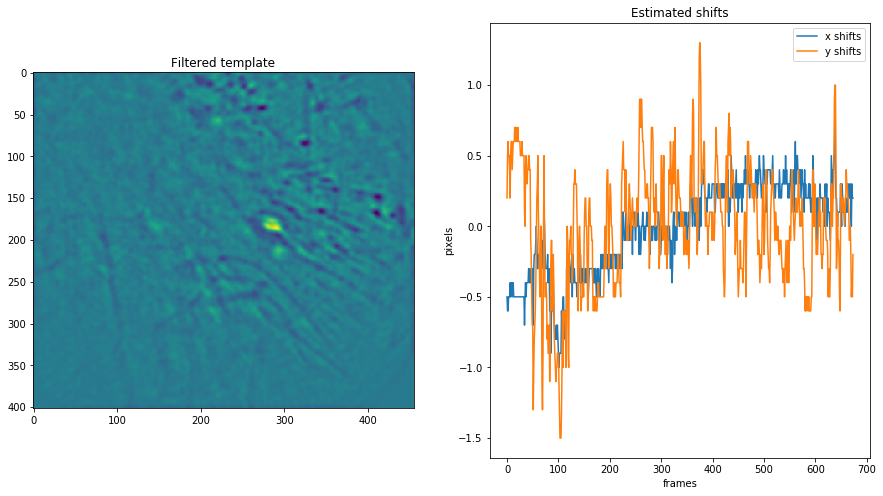

In [8]:
if do_motion_correction:
    mc = motion_correct_oneP_rigid('cropped_combined.tif',                        # name of file to motion correct
                               gSig_filt = [gSig*5],                 # size of filter, xhange this one if algorithm does not work 
                               max_shifts = [5,5],                   # maximum shifts allowed in each direction 
                               dview=dview, 
                               splits_rig = 2,                      # number of chunks for parallelizing motion correction (remember that it should hold that length_movie/num_splits_to_process_rig>100) 
                               save_movie = True)                    # whether to save movie in memory mapped format
    
    new_templ = mc.total_template_rig
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)    
    plt.title('Filtered template')
    plt.imshow(new_templ)       #% plot template
    plt.subplot(1,2,2)
    plt.title('Estimated shifts')
    plt.plot(mc.shifts_rig)     #% plot rigid shifts
    plt.legend(['x shifts', 'y shifts'])
    plt.xlabel('frames')
    plt.ylabel('pixels')
    
    bord_px_rig = np.ceil(np.max(mc.shifts_rig)).astype(np.int)     #borders to eliminate from movie because of motion correction        
    fname_new = cm.save_memmap(mc.fname_tot_rig, base_name='memmap_', order = 'C') # transforming memoruy mapped file in C order (efficient to perform computing)
else:
    #% create memory mappable file
    fname_new = cm.save_memmap(fname, base_name='memmap_', order = 'C')

# load memory mappable file
Yr, dims, T = cm.load_memmap(fname_new)
Y = Yr.T.reshape((T,) + dims, order='F')

In [9]:
m_corr = cm.movie(Y)
downsample_ratio = 1.
offset_corr = -np.min(m_corr[:100])  # make the dataset mostly non-negative
m_corr.resize(1, 1, downsample_ratio).play(
gain=1, offset=offset_mov, fr=30, magnification=1)

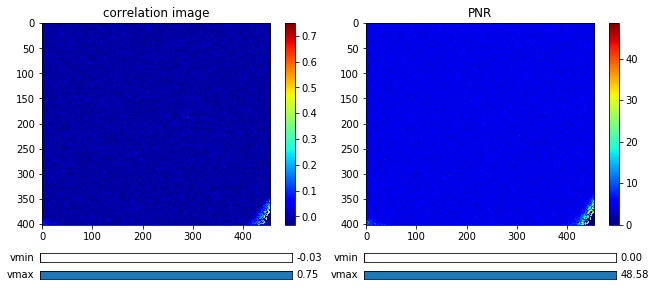

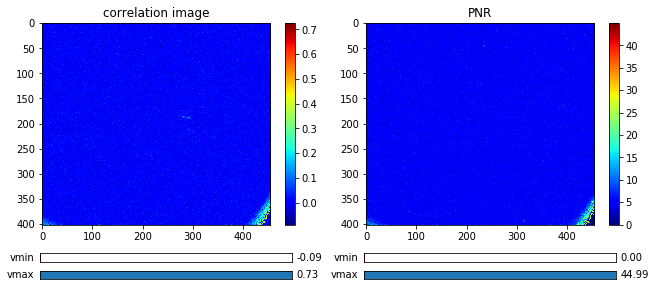

In [10]:
# compute some summary images (correlation and peak to noise)
cn_filter_orig, pnr_orig = cm.summary_images.correlation_pnr(m_orig,gSig=gSig, swap_dim=False) # change swap dim if output looks weird, it is a problem with tiffile
cn_filter, pnr = cm.summary_images.correlation_pnr(Y, gSig=gSig, swap_dim=False) # change swap dim if output looks weird, it is a problem with tiffile
# inspect the summary images and set the parameters
inspect_correlation_pnr(cn_filter_orig,pnr_orig)
inspect_correlation_pnr(cn_filter,pnr)


### Inspect summary images and set parameters
Check the optimal values of min_corr and min_pnr by moving slider in the figure that pops up

In [12]:
%%capture
#% compute metrics for the results (TAKES TIME!!)
final_size = np.subtract(mc.total_template_rig.shape, 2 * 3) # remove pixels in the boundaries
winsize = 100
swap_dim = False
resize_fact_flow = .2    # downsample for computing ROF

tmpl_rig, correlations_orig, flows_orig, norms_orig, crispness_orig = cm.motion_correction.compute_metrics_motion_correction(
    fname[0], final_size[0], final_size[1], swap_dim, winsize=winsize, play_flow=False, resize_fact_flow=resize_fact_flow)

tmpl_rig, correlations_rig, flows_rig, norms_rig, crispness_rig = cm.motion_correction.compute_metrics_motion_correction(
    mc.fname_tot_rig[0], final_size[0], final_size[1],
    swap_dim, winsize=winsize, play_flow=False, resize_fact_flow=resize_fact_flow)

# tmpl_els, correlations_els, flows_els, norms_els, crispness_els = cm.motion_correction.compute_metrics_motion_correction(
#     mc.fname_tot_els[0], final_size[0], final_size[1],
#     swap_dim, winsize=winsize, play_flow=False, resize_fact_flow=resize_fact_flow)

In [13]:
# print crispness values
print('Crispness original: '+ str(int(crispness_orig)))
print('Crispness rigid: '+ str(int(crispness_rig)))

Crispness original: 1181
Crispness rigid: 1030


['flows', 'norms', 'correlations', 'smoothness', 'tmpl', 'smoothness_corr', 'img_corr']
mov_metrics.npz
46.442173+/-19.26148 ; 1181.0211 ; 4.309328978599366
File is:
mov.mmap
File is:
mov.tif
['flows', 'norms', 'correlations', 'smoothness', 'tmpl', 'smoothness_corr', 'img_corr']
cropped_combined_rig__d1_402_d2_455_d3_1_order_F_frames_674__metrics.npz
141.69704+/-76.344345 ; 1030.887 ; nan
mmap


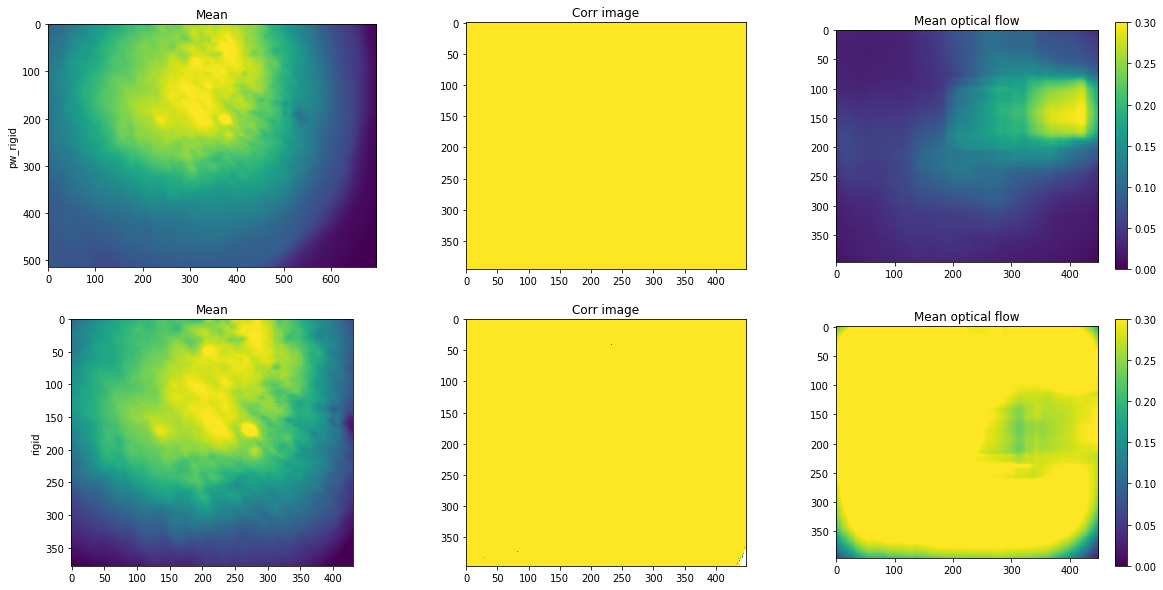

In [19]:
#%% plot the results of Residual Optical Flow
fls = [ 'mov_metrics.npz',mc.fname_tot_rig[0][:-5]+ '_metrics.npz']
        #mc.fname[0][:-5] + '_metrics.npz']

#print('Running time rigid motion: ' + str(t_rigid))
#print('Running time piecewise motion: ' + str(t_pw))

plt.figure(figsize = (20,10))
for cnt, fl, metr in zip(range(len(fls)),fls,['pw_rigid','rigid','raw']):
    with np.load(fl) as ld:
        print(ld.keys())
        print(fl)
        print(str(np.mean(ld['norms'])) + '+/-' + str(np.std(ld['norms'])) +
              ' ; ' + str(ld['smoothness']) + ' ; ' + str(ld['smoothness_corr']))
        
        plt.subplot(len(fls), 3, 1 + 3 * cnt)
        plt.ylabel(metr)
        try:
            mean_img = np.mean(
            cm.load(fl[:-12] + '.mmap'), 0)[12:-12, 12:-12]
        except:
            try:
                mean_img = np.mean(
                    cm.load(fl[:-12] + '.tif'), 0)[12:-12, 12:-12]
            except:
                mean_img = np.mean(
                    cm.load(fl[:-12] + '.hdf5'), 0)[12:-12, 12:-12]
                    
        lq, hq = np.nanpercentile(mean_img, [.5, 99.5])
        plt.imshow(mean_img, vmin=lq, vmax=hq)
        plt.title('Mean')
        plt.subplot(len(fls), 3, 3 * cnt + 2)
        plt.imshow(ld['img_corr'], vmin=0, vmax=.35)
        plt.title('Corr image')
        plt.subplot(len(fls), 3, 3 * cnt + 3)
        #plt.plot(ld['norms'])
        #plt.xlabel('frame')
        #plt.ylabel('norm opt flow')
        #plt.subplot(len(fls), 3, 3 * cnt + 3)
        flows = ld['flows']
        plt.imshow(np.mean(
        np.sqrt(flows[:, :, :, 0]**2 + flows[:, :, :, 1]**2), 0), vmin=0, vmax=0.3)
        plt.colorbar()
        plt.title('Mean optical flow')      

### Inspect summary images and set parameters
Check the optimal values of min_corr and min_pnr by moving slider in the figure that pops up

In [20]:

min_corr = .8 # min correlation of peak (from correlation image)
min_pnr = 10 # min peak to noise ratio
min_SNR = 3 # adaptive way to set threshold on the transient size
r_values_min = 0.85  # threshold on space consistency (if you lower more components will be accepted, potentially with worst quality)
decay_time = 0.4  #decay time of transients/indocator

In [21]:
### Set CNMF parameters and run it

In [22]:
cnm = cnmf.CNMF(n_processes=n_processes, 
                method_init='corr_pnr',                 # use this for 1 photon
                k=70,                                   # neurons per patch
                gSig=(3, 3),                            # half size of neuron
                gSiz=(10, 10),                          # in general 3*gSig+1
                merge_thresh=.8,                        # threshold for merging
                p=1,                                    # order of autoregressive process to fit
                dview=dview,                            # if None it will run on a single thread
                tsub=2,                                 # downsampling factor in time for initialization, increase if you have memory problems             
                ssub=2,                                 # downsampling factor in space for initialization, increase if you have memory problems
                Ain=None,                               # if you want to initialize with some preselcted components you can pass them here as boolean vectors
                rf=(40, 40),                            # half size of the patch (final patch will be 100x100)
                stride=(20, 20),                        # overlap among patches (keep it at least large as 4 times the neuron size)
                only_init_patch=True,                   # just leave it as is
                gnb=16,                                 # number of background components
                nb_patch=16,                            # number of background components per patch
                method_deconvolution='oasis',           #could use 'cvxpy' alternatively
                low_rank_background=True,               #leave as is
                update_background_components=True,      # sometimes setting to False improve the results
                min_corr=min_corr,                      # min peak value from correlation image 
                min_pnr=min_pnr,                        # min peak to noise ration from PNR image
                normalize_init=False,                   # just leave as is
                center_psf=True,                        # leave as is for 1 photon
                del_duplicates=True)                    # whether to remove duplicates from initialization

cnm.fit(Y)

(674, 402, 455)
using 16 processes
using 4000 pixels per process
using 5000 block_size
(80, 80)
751.3658061027527
Transforming patches into full matrix
Skipped %d Empty Patch 0
Generating background
Compressing background components with a low rank NMF
Generating background DONE
merging
No neurons merged!
update temporal


/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


Generating residuals
parallel dot product block size: 5000
Start product
Processed:[0, 20]
Transposing
Processed:[20, 37]
Transposing
entering the deconvolution 
36 out of total 55 temporal components updated
51 out of total 55 temporal components updated
54 out of total 55 temporal components updated
55 out of total 55 temporal components updated
36 out of total 55 temporal components updated
51 out of total 55 temporal components updated
54 out of total 55 temporal components updated
55 out of total 55 temporal components updated
stopping: overall temporal component not changing significantly
update spatial ...
Initializing update of Spatial Components
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
parallel dot product block size: 5000
Start product
Processed:[0, 20]
Filling
Processed:[20, 37]
Filling
--- 121.74578261375427 seconds ---
Removing tempfiles created
update temporal
Generating residuals


plot contours of identified components against correlation image

/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/utils/visualization.py:941: UserWarning: The way to call utilities.plot_contours has changed. Look at the definition for more details.
  warn("The way to call utilities.plot_contours has changed. Look at the definition for more details.")


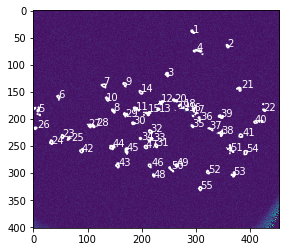

In [34]:
crd = cm.utils.visualization.plot_contours(cnm.A, cn_filter, thr=.1, vmax=0.95)

## Component Evaluation

The processing in patches creates several spurious components. These are filtered out by evaluating each component using three different criteria:

- the shape of each component must be correlated with the data at the corresponding location within the FOV
- a minimum peak SNR is required over the length of a transient
- each shape passes a CNN based classifier

<img src="docs/img/evaluationcomponent.png"/>

In [24]:
#%% COMPONENT EVALUATION
# the components are evaluated in three ways:
#   a) the shape of each component must be correlated with the data
#   b) a minimum peak SNR is required over the length of a transient
#   c) each shape passes a CNN based classifier

idx_components, idx_components_bad, comp_SNR, r_values, pred_CNN = estimate_components_quality_auto(
                            Y, cnm.A, cnm.C, cnm.b, cnm.f, cnm.YrA, frate, 
                            decay_time, gSig, dims, dview = dview, 
                            min_SNR=min_SNR, r_values_min = r_values_min, min_std_reject = 0.5, use_cnn = False)

print(' ***** ')
print((len(cnm.C)))
print((len(idx_components)))
print(r_values[idx_components_bad])

EVALUATING IN PARALLEL... NOT RETURNING ERFCs
 ***** 
55
34
[ 0.53012949  0.63972085 -0.20683124  0.26904231 -0.20789811  0.34752205
 -0.33517041  0.5756963   0.14606814  0.40980938  0.27109296  0.12970781
 -0.27095089  0.46875086 -0.11802019  0.31670467 -0.39750129 -0.20523491
  0.26229771  0.83662413  0.23520587]


Plot contours of selected and rejected components

/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/utils/visualization.py:941: UserWarning: The way to call utilities.plot_contours has changed. Look at the definition for more details.
  warn("The way to call utilities.plot_contours has changed. Look at the definition for more details.")


Text(0.5,1,'Contour plots of rejected components')

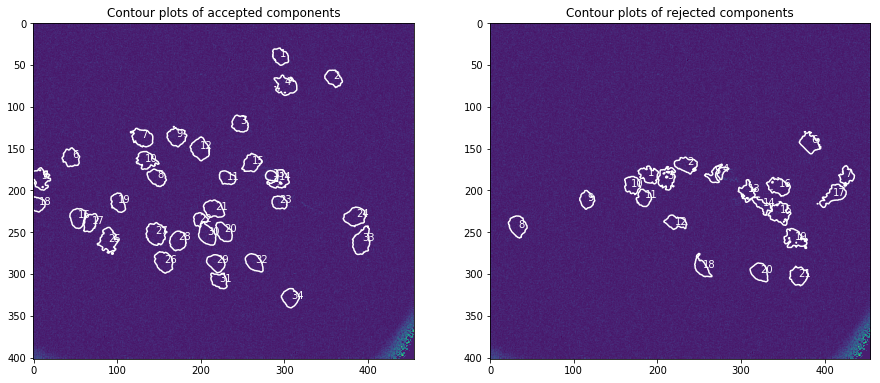

In [25]:
#%% PLOT COMPONENTS

plt.figure(figsize=(15,8));
plt.subplot(121);
crd = cm.utils.visualization.plot_contours(cnm.A.tocsc()[:,idx_components], cn_filter, thr=.8, vmax=0.95)
plt.title('Contour plots of accepted components')
plt.subplot(122); 
crd = cm.utils.visualization.plot_contours(cnm.A.tocsc()[:,idx_components_bad], cn_filter, thr=.8, vmax=0.95)
plt.title('Contour plots of rejected components')

View traces of accepted and rejected components. Note that if you get data rate error you can start Jupyter notebooks using:
'jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10'

In [26]:
# accepted components
nb_view_patches(Yr, cnm.A.tocsc()[:, idx_components], cnm.C[idx_components], 
                cnm.b, cnm.f, dims[0], dims[1], YrA=cnm.YrA[idx_components], image_neurons = cn_filter,
                denoised_color = 'red', thr=0.8, cmap='gray');

In [27]:
# rejected components
nb_view_patches(Yr, cnm.A.tocsc()[:, idx_components_bad], cnm.C[idx_components_bad], 
                cnm.b, cnm.f, dims[0], dims[1], YrA=cnm.YrA[idx_components_bad], image_neurons = cn_filter,
                denoised_color = 'red', thr=0.8, cmap='gray');

### Stop cluster

In [28]:
#%%
cm.stop_server(dview=dview)

 done


### Some instructive movies

In [30]:
#%% denoised movie
cm.movie(np.reshape(cnm.A.tocsc()[:,idx_components].dot(cnm.C[idx_components])+cnm.b.dot(cnm.f),dims+(-1,), order = 'F').transpose(2,0,1)).play(magnification=1, gain = 1.)

In [31]:
#%% only neurons
cm.movie(np.reshape(cnm.A.tocsc()[:,idx_components].dot(cnm.C[idx_components]),dims+(-1,), order = 'F').transpose(2,0,1)).play(magnification=1, gain = 10.)

In [32]:
#%% only the background
cm.movie(np.reshape(cnm.b.dot(cnm.f),dims+(-1,), order = 'F').transpose(2,0,1)).play(magnification=1, gain = 1.)

In [33]:
#%% residuals
cm.movie(np.array(Y)-np.reshape(cnm.A.tocsc()[:,:].dot(cnm.C[:])+cnm.b.dot(cnm.f),dims+(-1,), order = 'F').transpose(2,0,1)).play(magnification=1, gain = 10., fr = 10)


In [ ]:
#%% eventuall, you can rerun the algorithm on the residuals
plt.imshow(cm.movie(np.array(Y)-np.reshape(cnm.A.tocsc()[:,:].dot(cnm.C[:])+cnm.b.dot(cnm.f),dims+(-1,), order = 'F').transpose(2,0,1)).local_correlations(swap_dim=False))